In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


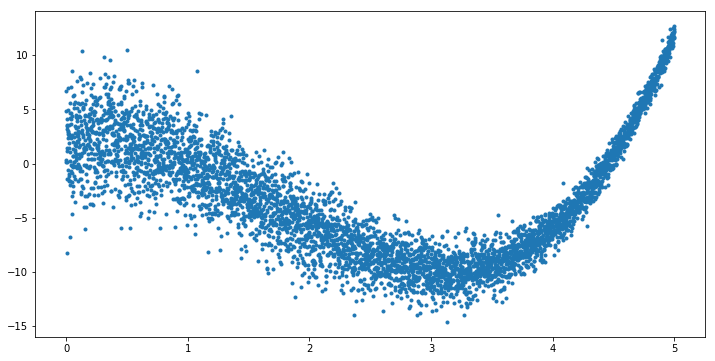

In [2]:
x_train = np.arange(0, 5, 0.001)
mu = x_train**3 - 5*(x_train**2) + 2*x_train + 2
std = 3 - x_train / 2.
y_train = mu + (std * np.random.normal(size=std.shape))
plt.figure(figsize=[12, 6]).add_subplot(111).scatter(x_train, y_train, marker='.')

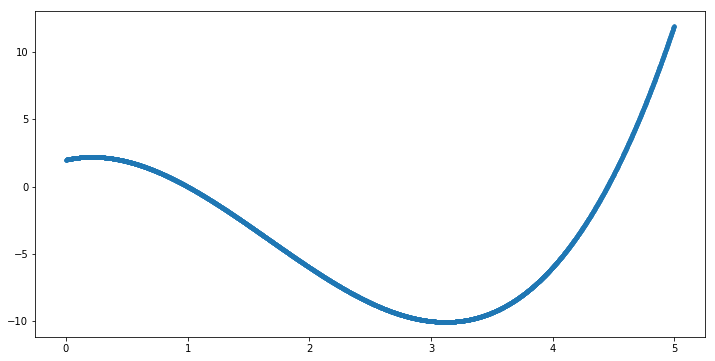

In [3]:
plt.figure(figsize=[12, 6]).add_subplot(111).scatter(x_train, mu, marker='.')

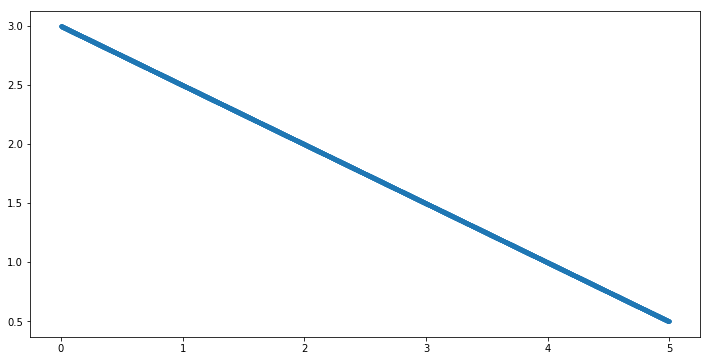

In [4]:
plt.figure(figsize=[12, 6]).add_subplot(111).scatter(x_train, std, marker='.')

In [5]:
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None])
learning_rate = tf.placeholder(tf.float32)

out = tf.layers.dense(x, 50, activation=tf.nn.relu)
out = tf.layers.dense(out, 50, activation=tf.nn.relu)
out = tf.layers.dense(out, 50, activation=tf.nn.relu)
y_hat = tf.layers.dense(out, 2)

mu = y_hat[:, 0]
sigma = tf.nn.softplus(y_hat[:, 1])
term_1 = ((y - mu)**2) / (sigma**2)
term_2 = tf.log(sigma**2)
loss = tf.reduce_mean(term_1 + term_2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
opt = optimizer.minimize(loss)

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x_train = x_train.reshape([-1, 1])
lr = 0.01
for i in range(15000):
    lr = lr / 10. if (i + 1) in [5000, 9000, 12000] else lr
    f_dict = {x: x_train, y: y_train, learning_rate: lr}
    _, l = sess.run([opt, loss], feed_dict=f_dict)
    if (i+1) % 200 == 0:
        print("step {} - loss {:.5f}".format(i+1, l))

step 200 - loss 4.23650
step 400 - loss 4.16689
step 600 - loss 4.10119
step 800 - loss 4.04299
step 1000 - loss 3.99323
step 1200 - loss 3.95004
step 1400 - loss 3.90844
step 1600 - loss 3.86065
step 1800 - loss 3.79658
step 2000 - loss 3.69976
step 2200 - loss 3.54153
step 2400 - loss 3.28647
step 2600 - loss 2.96732
step 2800 - loss 3.02087
step 3000 - loss 2.73059
step 3200 - loss 2.73491
step 3400 - loss 2.72844
step 3600 - loss 2.69333
step 3800 - loss 2.66313
step 4000 - loss 2.63587
step 4200 - loss 2.60540
step 4400 - loss 2.58719
step 4600 - loss 2.57031
step 4800 - loss 2.50259
step 5000 - loss 2.48901
step 5200 - loss 2.20346
step 5400 - loss 2.11374
step 5600 - loss 2.06156
step 5800 - loss 2.03194
step 6000 - loss 2.05508
step 6200 - loss 2.06662
step 6400 - loss 2.07032
step 6600 - loss 2.07253
step 6800 - loss 2.06999
step 7000 - loss 2.07412
step 7200 - loss 2.08135
step 7400 - loss 2.06436
step 7600 - loss 2.07608
step 7800 - loss 2.07694
step 8000 - loss 2.07992
step

In [7]:
f_dict = {x: x_train}
u, sig = sess.run([mu, sigma], feed_dict=f_dict)

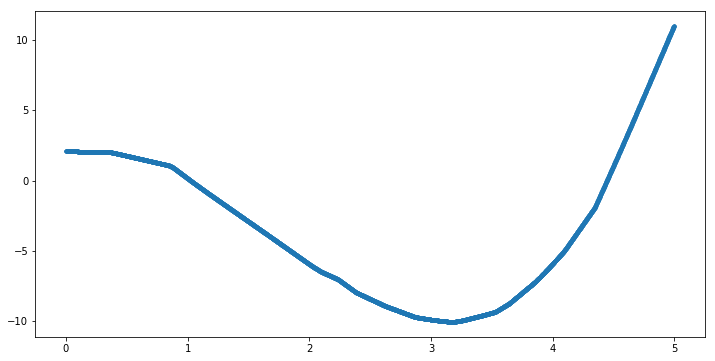

In [8]:
plt.figure(figsize=[12, 6]).add_subplot(111).scatter(x_train, u, marker='.')

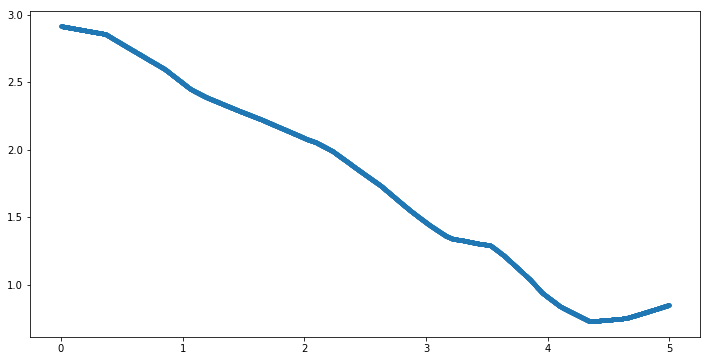

In [9]:
plt.figure(figsize=[12, 6]).add_subplot(111).scatter(x_train, sig, marker='.')